<a href="https://colab.research.google.com/github/matheus-haruki/Processamento-de-Linguagem-Natural/blob/main/Aula_11_Pipeline_de_Classifica%C3%A7%C3%A3o_de_Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução à Aprendizagem de Máquina para PLN**

Objetivos da aula

Introduzir os conceitos fundamentais de Aprendizagem de Máquina aplicados ao Processamento de Linguagem Natural, com foco em modelos clássicos de classificação de texto e na construção de pipelines completos.

Objetivos Específicos:

* Compreender os princípios básicos da Aprendizagem de Máquina supervisionada.
* Implementar e aplicar os modelos clássicos de classificação de texto:
  * Naive Bayes
  * Árvores de Decisão
* Entender a importância e as etapas de um pipeline de classificação de texto, desde a preparação dos dados até a avaliação dos resultados.


Etapa 0: Criando a base de dados a ser utilizada

In [14]:
# Criando a base de dados a ser utilizada
import pandas as pd

# Criar um dicionário com dados de exemplo
data = {
    'texto': [
        "Este é um ótimo filme!",
        "O produto é muito ruim.",
        "Adorei o atendimento ao cliente.",
        "A entrega atrasou e o produto veio com defeito.",
        "Recomendo este livro a todos!",
        "Não gostei da experiência.",
        "O serviço foi excelente.",
        "Péssima qualidade, não comprem!",
        "Amei o presente, muito obrigado!",
        "Que decepção, perdi meu dinheiro."
    ],
    'categoria': [
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo"
    ]
}

# Criar um DataFrame a partir do dicionário
df = pd.DataFrame(data)

# Salvar o DataFrame em um arquivo CSV
df.to_csv('dados_rotulados.csv', index=False, encoding='utf-8')

print("Base de dados criada e salva em 'dados_rotulados.csv'")


Base de dados criada e salva em 'dados_rotulados.csv'


**Etapa 1: Preparação dos dados**

In [23]:
# Passo 1: Importando as bibliotecas necessárias
import nltk
import spacy
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')
# Download the punkt_tab resource which is required for word_tokenize's internal sentence tokenization
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Informações do conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   texto      10 non-null     object
 1   categoria  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes
None

Primeiras 5 linhas do conjunto de dados:
                                             texto categoria
0                           Este é um ótimo filme!  positivo
1                          O produto é muito ruim.  negativo
2                 Adorei o atendimento ao cliente.  positivo
3  A entrega atrasou e o produto veio com defeito.  negativo
4                    Recomendo este livro a todos!  positivo


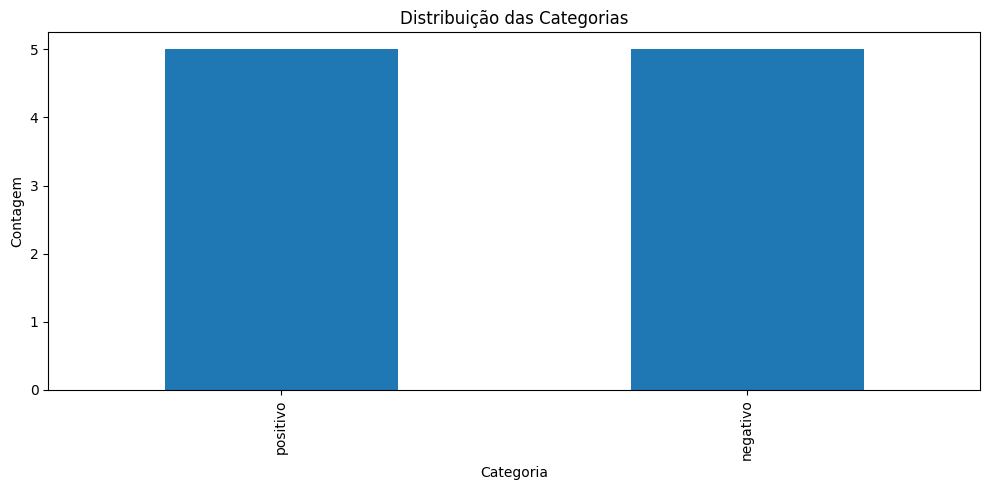

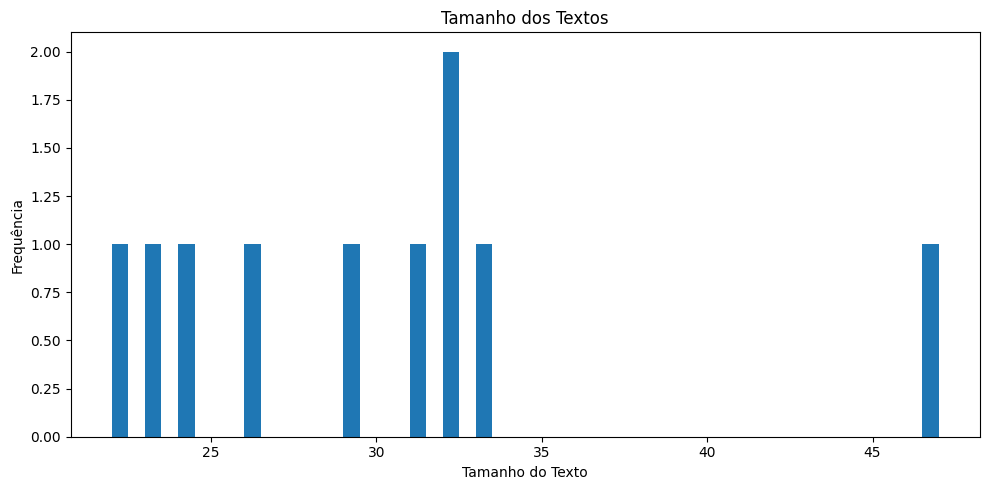

In [24]:
# Passo 2: Carregar o conjunto de dados de texto rotulado
data = pd.read_csv('dados_rotulados.csv', encoding='utf-8')

# Passo 3: Explorar e visualizar os dados
print("Informações do conjunto de dados:")
print(data.info())

print("\nPrimeiras 5 linhas do conjunto de dados:")
print(data.head())

# Distribuição das categorias
plt.figure(figsize=(10, 5))
data['categoria'].value_counts().plot(kind='bar')
plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Tamanho dos textos
tamanhos_textos = data['texto'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(tamanhos_textos, bins=50)
plt.title('Tamanho dos Textos')
plt.xlabel('Tamanho do Texto')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


In [22]:
# Inicializa objetos uma vez fora da função
stop_words = set(stopwords.words('portuguese'))
stemmer = SnowballStemmer('portuguese')

# Passo 4: Realizar o pré-processamento do texto
def preprocessar_texto(texto):
    # Passo 4.1: Limpar o texto
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    texto = ''.join([c for c in texto if not c.isdigit()])
    texto = texto.strip()

    # Passo 4.2: Tokenizar o texto
    tokens = word_tokenize(texto.lower())

    # Passo 4.3: Remover stopwords
    tokens = [palavra for palavra in tokens if palavra not in stop_words]

    # Passo 4.4: Aplicar stemming
    tokens = [stemmer.stem(palavra) for palavra in tokens]
    return ' '.join(tokens)

# Aplica a função de pré-processamento à coluna 'texto'
data['texto_processado'] = data['texto'].apply(preprocessar_texto)

# Passo 5: Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(
    data['texto_processado'], data['categoria'], test_size=0.2, random_state=42)

# Exibe os tamanhos dos conjuntos
print("\nTamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))



Tamanho do conjunto de treinamento: 8
Tamanho do conjunto de teste: 2


**Etapa 2: Extração de características**

In [25]:
# Importação das bibliotecas a serem utilizadas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Etapa 2: Extração de características
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Exibe o número de características extraídas
print("\nNúmero de características extraídas:", X_train_tfidf.shape[1])

# Etapa 3: Treinamento do modelo
modelo = MultinomialNB()
modelo.fit(X_train_tfidf, y_train)

# Passo 4: Avaliação do modelo
y_pred = modelo.predict(X_test_tfidf)
acurácia = accuracy_score(y_test, y_pred)
print("\nAcurácia do modelo:", acurácia)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Número de características extraídas: 23

Acurácia do modelo: 0.5

Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Passo 5: Classificação de um novo texto
def classifier_texto(texto, vectorizer, modelo):
    # Preprocessa o texto de entrada
    texto_processado = preprocessar_texto(texto)
    # Converte o texto pré-processado em um vetor TF-IDF
    texto_tfidf = vectorizer.transform([texto_processado])
    # Classifica o texto usando o modelo treinado
    categoria_prevista = modelo.predict(texto_tfidf)[0]
    # (Optional) Obtém as probabilidades de cada categoria
    probabilidades = modelo.predict_proba(texto_tfidf)[0]
    categorias = modelo.classes_
    probabilidades_por_categoria = dict(zip(categorias, probabilidades))
    return categoria_prevista, probabilidades_por_categoria

# Exemplo de uso da função para classificar um novo texto
novo_texto = "Este filme é incrível, recomendo a todos!"
categoria, probabilidades = classifier_texto(novo_texto, vectorizer, modelo)
print("\nNovo texto:", novo_texto)
print("Categoria prevista:", categoria)
print("Probabilidades por categoria:", probabilidades)


Novo texto: Este filme é incrível, recomendo a todos!
Categoria prevista: positivo
Probabilidades por categoria: {np.str_('negativo'): np.float64(0.29256806327043555), np.str_('positivo'): np.float64(0.7074319367295648)}


**Etapa 3: Treinamento do modelo**

In [27]:
# Importação das ferramentas utilizadas
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Etapa 3: Treinamento do modelo
# Passo 1: Escolher modelos de aprendizado de máquina
naive_bayes_model = MultinomialNB()
logistic_regression_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42, probability=True)

# Passo 2: Treinar os modelos
naive_bayes_model.fit(X_train_tfidf, y_train)
logistic_regression_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)

# Passo 3: Ajuste de hiperparâmetros
param_grid_nb = {}  # Naive Bayes não possui hiperparâmetros significativos
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_search_lr = GridSearchCV(logistic_regression_model, param_grid_lr, cv=2)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=2)

In [28]:
grid_search_lr.fit(X_train_tfidf, y_train)
grid_search_svm.fit(X_train_tfidf, y_train)

# Imprime os melhores hiperparâmetros encontrados
print("\nMelhores hiperparâmetros para Regressão Logística:", grid_search_lr.best_params_)
print("Melhores hiperparâmetros para SVM:", grid_search_svm.best_params_)

# Obtém os modelos com os melhores hiperparâmetros
best_logistic_regression_model = grid_search_lr.best_estimator_
best_svm_model = grid_search_svm.best_estimator_

# Passo 4: Avaliação do modelo
print("\nResultados da avaliação:")

# Avaliação do modelo Naive Bayes
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
acuracia_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Multinomial:")
print("Acurácia:", acuracia_nb)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nb))

# Avaliação do modelo de Regressão Logística
y_pred_lr = best_logistic_regression_model.predict(X_test_tfidf)
acuracia_lr = accuracy_score(y_test, y_pred_lr)
print("\nRegressão Logística:")
print("Acurácia:", acuracia_lr)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr))


Melhores hiperparâmetros para Regressão Logística: {'C': 0.1, 'solver': 'liblinear'}
Melhores hiperparâmetros para SVM: {'C': 1, 'kernel': 'rbf'}

Resultados da avaliação:

Naive Bayes Multinomial:
Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Regressão Logística:
Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [29]:
# Avaliação do modelo SVM
y_pred_svm = best_svm_model.predict(X_test_tfidf)
acuracia_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM:")
print("Acurácia:", acuracia_svm)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm))

# Passo 5: Classificação de um novo texto
def classifier_texto(texto, vectorizer, modelo):
    # Preprocessa o texto de entrada
    texto_processado = preprocessar_texto(texto)
    # Converte o texto pré-processado em um vetor TF-IDF
    texto_tfidf = vectorizer.transform([texto_processado])
    # Classifica o texto usando o modelo treinado
    categoria_prevista = modelo.predict(texto_tfidf)[0]
    # (Optional) Obtém as probabilidades de cada categoria
    probabilidades = modelo.predict_proba(texto_tfidf)[0]
    categorias = modelo.classes_
    probabilidades_por_categoria = dict(zip(categorias, probabilidades))
    return categoria_prevista, probabilidades_por_categoria


SVM:
Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         1
    positivo       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [30]:
# Exemplo de uso da função para classificar um novo texto
novo_texto = "Este filme é incrível, recomendo a todos!"
categoria_nb, probabilidades_nb = classifier_texto(novo_texto, vectorizer, naive_bayes_model)
categoria_lr, probabilidades_lr = classifier_texto(novo_texto, vectorizer, best_logistic_regression_model)
categoria_svm, probabilidades_svm = classifier_texto(novo_texto, vectorizer, best_svm_model)

print("\nNovo texto:", novo_texto)
print("\nResultados da classificação:")
print("\nNaive Bayes Multinomial:")
print("Categoria prevista:", categoria_nb)
print("Probabilidades por categoria:", probabilidades_nb)
print("\nRegressão Logística:")
print("Categoria prevista:", categoria_lr)
print("Probabilidades por categoria:", probabilidades_lr)
print("\nSVM:")
print("Categoria prevista:", categoria_svm)
print("Probabilidades por categoria:", probabilidades_svm)


Novo texto: Este filme é incrível, recomendo a todos!

Resultados da classificação:

Naive Bayes Multinomial:
Categoria prevista: positivo
Probabilidades por categoria: {np.str_('negativo'): np.float64(0.29256806327043555), np.str_('positivo'): np.float64(0.7074319367295648)}

Regressão Logística:
Categoria prevista: positivo
Probabilidades por categoria: {'negativo': np.float64(0.4868942836287754), 'positivo': np.float64(0.5131057163712246)}

SVM:
Categoria prevista: positivo
Probabilidades por categoria: {'negativo': np.float64(0.8817303978937229), 'positivo': np.float64(0.11826960210627731)}


**Etapa 4: Avaliação do modelo**


Etapa 4: Avaliação do Modelo

Resultados da Avaliação:

Naive Bayes Multinomial:
Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Regressão Logística:
Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


SVM:
Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         

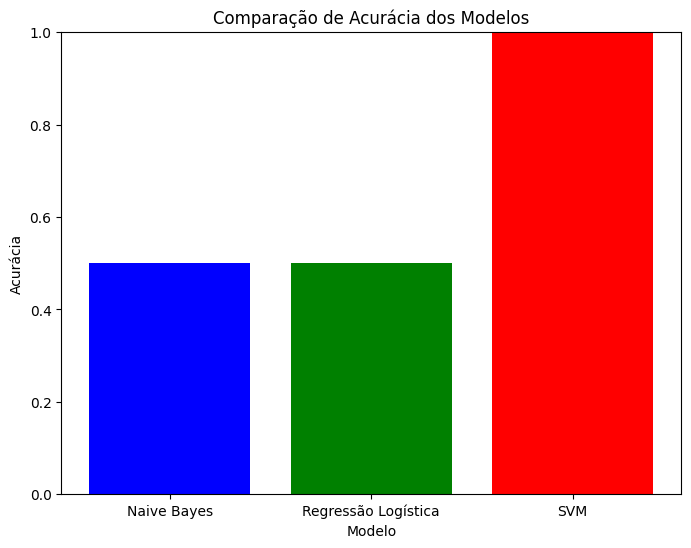

In [31]:
# Etapa 4: Avaliação do modelo
print("\nEtapa 4: Avaliação do Modelo")
print("\nResultados da Avaliação:")

# Avaliação do modelo Naive Bayes
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
acuracia_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Multinomial:")
print("Acurácia:", acuracia_nb)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nb, zero_division=0))

# Avaliação do modelo de Regressão Logística
y_pred_lr = best_logistic_regression_model.predict(X_test_tfidf)
acuracia_lr = accuracy_score(y_test, y_pred_lr)
print("\nRegressão Logística:")
print("Acurácia:", acuracia_lr)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr, zero_division=0))

# Avaliação do modelo SVM
y_pred_svm = best_svm_model.predict(X_test_tfidf)
acuracia_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM:")
print("Acurácia:", acuracia_svm)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm, zero_division=0))

# Comparação de desempenho
print("\nComparação de Modelos:")
print(f"- Acurácia Naive Bayes: {acuracia_nb:.4f}")
print(f"- Acurácia Regressão Logística: {acuracia_lr:.4f}")
print(f"- Acurácia SVM: {acuracia_svm:.4f}")

# Visualização gráfica
modelos = ['Naive Bayes', 'Regressão Logística', 'SVM']
acuracias = [acuracia_nb, acuracia_lr, acuracia_svm]

plt.figure(figsize=(8, 6))
plt.bar(modelos, acuracias, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.ylim(0, 1)
plt.show()

**Etapa 5: Classificação de um novo texto**

In [32]:
# Etapa 5: Classificação de um novo texto
print("\nEtapa 5: Classificação de um Novo Texto")

def classificar_novo_texto(texto, vectorizer, modelo):
    """
    Classifica um novo texto de entrada usando o modelo treinado.

    Args:
        texto (str): O texto a ser classificado.
        vectorizer: O vectorizador TF-IDF usado para extrair as características do texto.
        modelo: O modelo de aprendizado de máquina treinado.

    Returns:
        str: A categoria prevista para o texto.
        dict: As probabilidades de o texto pertencer a cada categoria.
    """
    # Passo 1: Pré-processar o novo texto de entrada
    texto_processado = preprocessar_texto(texto)

    # Passo 2: Extrair as características do novo texto
    texto_tfidf = vectorizer.transform([texto_processado])

    # Passo 3: Prever a categoria do novo texto
    categoria_prevista = modelo.predict(texto_tfidf)[0]
    probabilidades = modelo.predict_proba(texto_tfidf)[0]
    categorias = modelo.classes_
    probabilidades_por_categoria = dict(zip(categorias, probabilidades))

    return categoria_prevista, probabilidades_por_categoria


Etapa 5: Classificação de um Novo Texto


In [34]:
# Etapa 5: Classificação de um novo texto
print("\nEtapa 5: Classificação de um Novo Texto")

def classificar_novo_texto(texto, vectorizer, modelo):
    """
    Classifica um novo texto de entrada usando o modelo treinado.

    Args:
        texto (str): O texto a ser classificado.
        vectorizer: O vectorizador TF-IDF usado para extrair as características do texto.
        modelo: O modelo de aprendizado de máquina treinado.

    Returns:
        str: A categoria prevista para o texto.
        dict: As probabilidades de o texto pertencer a cada categoria, se disponíveis.
    """
    # Passo 1: Pré-processar o novo texto de entrada
    texto_processado = preprocessar_texto(texto)

    # Passo 2: Extrair as características do novo texto
    texto_tfidf = vectorizer.transform([texto_processado])

    # Passo 3: Prever a categoria do novo texto
    categoria_prevista = modelo.predict(texto_tfidf)[0]

    # Passo 4: Obter probabilidades (se o modelo suportar)
    try:
        probabilidades = modelo.predict_proba(texto_tfidf)[0]
        categorias = modelo.classes_
        probabilidades_por_categoria = dict(zip(categorias, probabilidades))
    except AttributeError:
        probabilidades_por_categoria = {}

    return categoria_prevista, probabilidades_por_categoria


# Exemplo de uso da função para classificar um novo texto
novo_texto = "Este filme é incrível, recomendo a todos!"

print("\nNovo Texto:", novo_texto)
print("\nResultados da Classificação:")

# Classificar usando Naive Bayes
categoria_nb, probabilidades_nb = classificar_novo_texto(novo_texto, vectorizer, naive_bayes_model)
print("\nNaive Bayes:")
print(" Categoria Prevista:", categoria_nb)
if probabilidades_nb:
    print(" Probabilidades:", probabilidades_nb)

# Classificar usando Regressão Logística
categoria_lr, probabilidades_lr = classificar_novo_texto(novo_texto, vectorizer, best_logistic_regression_model)
print("\nRegressão Logística:")
print(" Categoria Prevista:", categoria_lr)
if probabilidades_lr:
    print(" Probabilidades:", probabilidades_lr)

# Classificar usando SVM
categoria_svm, probabilidades_svm = classificar_novo_texto(novo_texto, vectorizer, best_svm_model)
print("\nSVM:")
print(" Categoria Prevista:", categoria_svm)
if probabilidades_svm:
    print(" Probabilidades:", probabilidades_svm)



Etapa 5: Classificação de um Novo Texto

Novo Texto: Este filme é incrível, recomendo a todos!

Resultados da Classificação:

Naive Bayes:
 Categoria Prevista: positivo
 Probabilidades: {np.str_('negativo'): np.float64(0.29256806327043555), np.str_('positivo'): np.float64(0.7074319367295648)}

Regressão Logística:
 Categoria Prevista: positivo
 Probabilidades: {'negativo': np.float64(0.4868942836287754), 'positivo': np.float64(0.5131057163712246)}

SVM:
 Categoria Prevista: positivo
 Probabilidades: {'negativo': np.float64(0.8817303978937229), 'positivo': np.float64(0.11826960210627731)}
